In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
#Get the training data
dfx=pd.read_csv("C:/Users/yash pandey/Desktop/linearX.csv")
dfy=pd.read_csv("C:/Users/yash pandey/Desktop/linearY.csv")

In [106]:
# 99rows and 1 column
print(dfx.shape)

(99, 1)


In [36]:
#converting it into numpy array
dfx=dfx.values
dfy=dfy.values

In [37]:
#reshaping
x=dfx.reshape((-1,))
y=dfy.reshape((-1,))
print(x)
print(x.shape,y.shape)

[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]
(99,) (99,)


# DATA Preprocessing and Visualisation

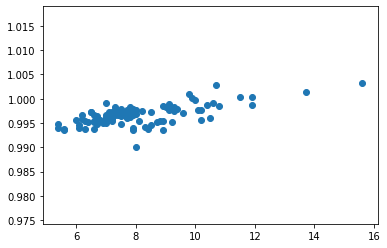

In [38]:
plt.scatter(x,y)
plt.show()

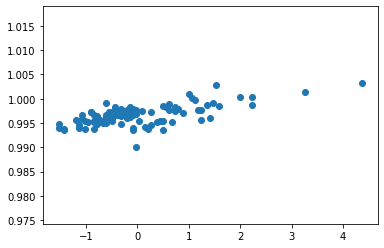

In [39]:
x=(x-x.mean())/x.std()
y=y
plt.scatter(x,y)
plt.show()

# Gradient descent algo
- Start with a random theta
- Repeat until converge
- update theta acc to the rule

In [76]:
def hypothesis(x,theta):
    return theta[0] +  theta[1]*x

In [77]:
def error(x,y,theta):
    error=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        error+=(hx-y[i])**2
    return error

In [78]:
def gradient(x,y,theta):
    grad=np.zeros((2,))
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0]+=(hx-y[i])
        grad[1]+=(hx-y[i])*x[i]
    return grad

In [79]:
def gradientdescent(x,y,learning_rate=0.001):
    #random theta
    theta=np.array([-2.0,0.0])
    max_iteration=100
    itr=0
    theta_list=[]
    error_list=[]
    while(itr<=max_iteration):
        grad=gradient(x,y,theta)
        arr=error(x,y,theta)
        error_list.append(arr)
        theta_list.append(theta)
        theta[0] -= learning_rate*grad[0]
        theta[1] -= learning_rate*grad[1]
        itr+=1
    return theta,error_list,theta_list

In [80]:
final_theta,error_list,theta_list=gradientdescent(x,y)

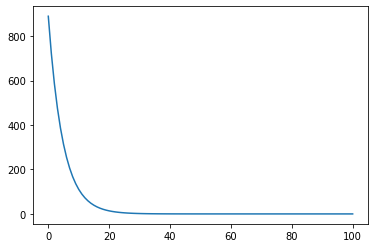

In [81]:
plt.plot(error_list)
plt.show()

In [82]:
print(final_theta)

[0.996554  0.0013579]


In [86]:
#plot line for test data
xtest=np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


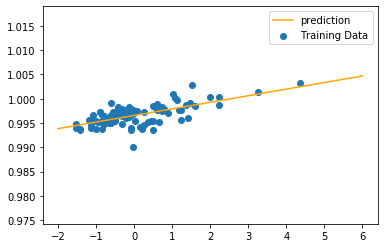

In [103]:
plt.scatter(x,y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='prediction')
plt.legend()
plt.show()